# FunctionTransformer – Custom Transformations in scikit-learn

`FunctionTransformer` is a utility in **scikit-learn** that allows you to apply **custom transformation functions**
to your data. It is especially useful when a required transformation is not available as a built-in scikit-learn
transformer.

It integrates seamlessly with **Pipelines** and **ColumnTransformer**, ensuring clean,
reproducible preprocessing.

---

## Why Use FunctionTransformer

FunctionTransformer is useful when:
- You need custom mathematical transformations  
- Built-in transformers are not sufficient  
- You want transformations inside a pipeline  
- You want to avoid manual preprocessing outside the workflow  

---

## Types of Transformations and When to Use Them

### 1. Log Transformation

**When to use:**
- Right-skewed data (long tail on the right)
- Features with exponential growth or large ranges

**Effect:**
- Reduces skewness  
- Compresses large values  
- Makes distributions more normal-like  

Common form:
- `log(x)` or `log1p(x)` (preferred when zeros are present)

---

### 2. Square Root Transformation

**When to use:**
- Moderately right-skewed data  
- Count-based features  

**Effect:**
- Reduces variance  
- Compresses larger values  
- Less aggressive than log transformation  

---

### 3. Reciprocal Transformation

**When to use:**
- Features with very large values dominating the distribution  

**Effect:**
- Strongly dampens large values  
- Can reverse ordering of values  
- Sensitive to zeros (must be handled carefully)  

Form:
- `1 / x`

---

### 4. Square Transformation

**When to use:**
- Left-skewed data (long tail on the left)  

**Effect:**
- Expands smaller values  
- Increases separation among low-magnitude values  
- Increases variance  

Form:
- `x²`



In [3]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df=df[['Age','Fare','Survived']]
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [16]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


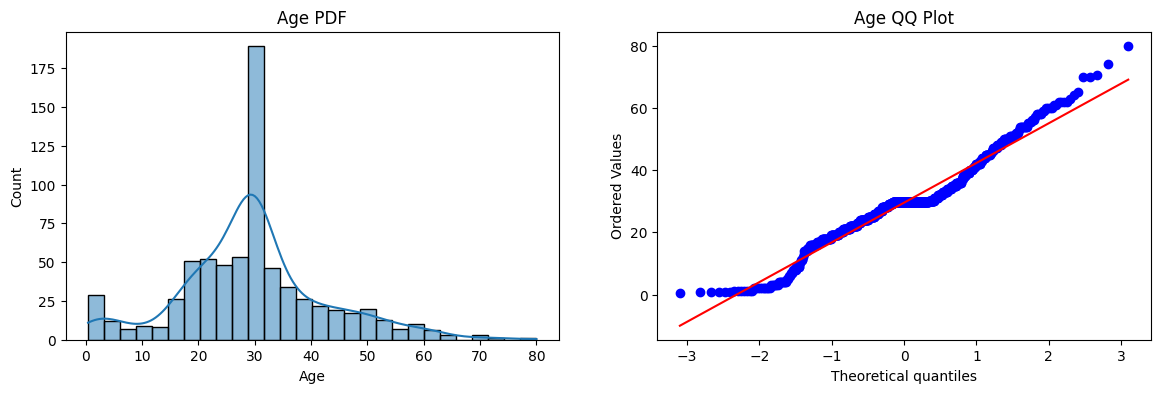

In [21]:
plt.figure(figsize=(14, 4))

# PDF / histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

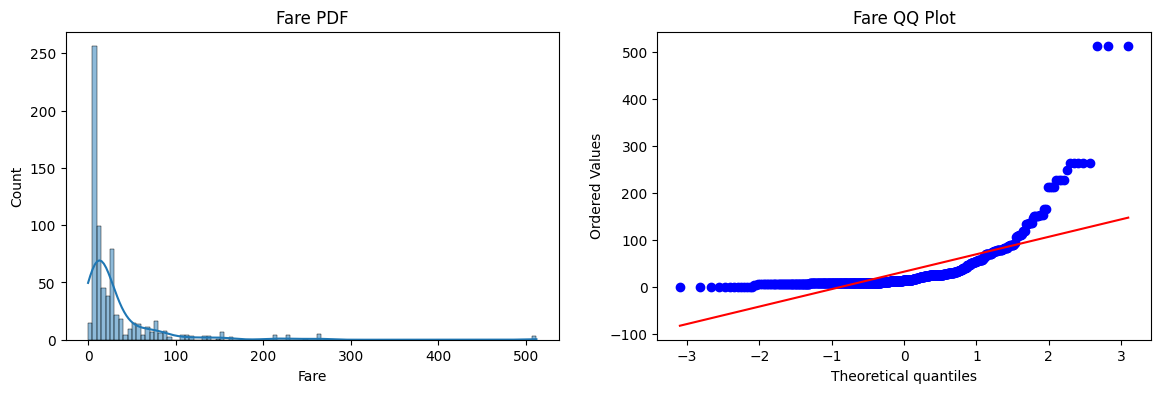

In [22]:
plt.figure(figsize=(14, 4))

# PDF / histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

## Log Transformation 

In [23]:
tnf=FunctionTransformer(func=np.log1p)

In [24]:
X_train_transformed=tnf.fit_transform(X_train)
X_test_transformed=tnf.transform(X_test)

In [27]:
clf=LogisticRegression()
clff=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clff.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_predd=clff.predict(X_test_transformed)

In [29]:
a1=accuracy_score(y_test,y_pred)
a2=accuracy_score(y_test,y_predd)
a1,a2

(0.6815642458100558, 0.664804469273743)

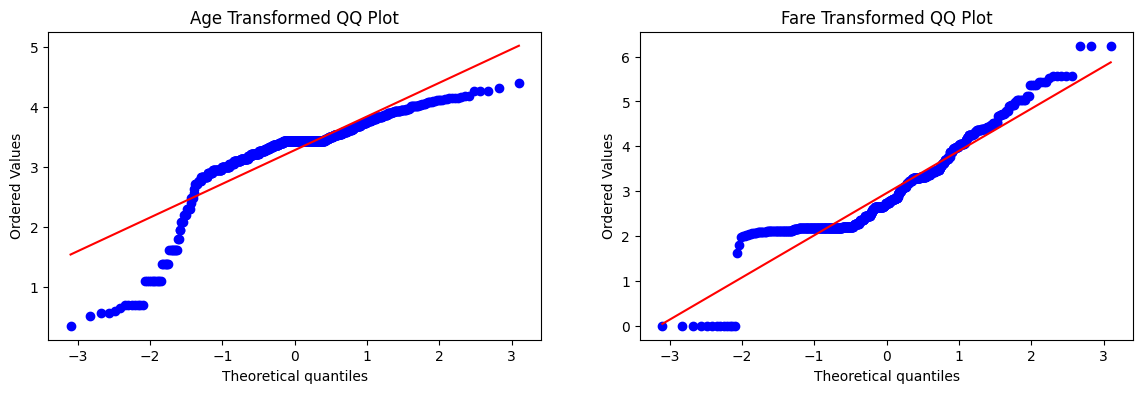

In [33]:
plt.figure(figsize=(14, 4))

# Age QQ-plot
plt.subplot(1, 2, 1)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age Transformed QQ Plot')

# Fare QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare Transformed QQ Plot')

plt.show()